## ML + Evaluation - Dataset 1

#### Import libraries and dataset


In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
df = pd.read_csv("../data/processed/dataset_1_processed.csv")

X = df.drop(columns=["CLASS_LABEL"])
y = df["CLASS_LABEL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define cross-validation strategy (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### CatBoost

##### Base CatBoost

Base CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1000
           1       0.88      0.94      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



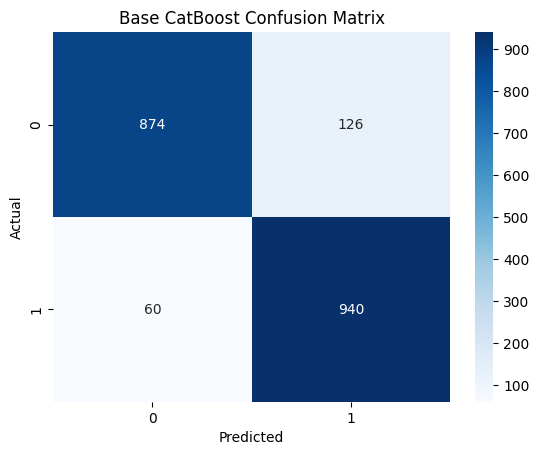

In [ ]:
base_catboost = CatBoostClassifier(verbose=0)
base_catboost.fit(X_train, y_train)

# Evaluate model
y_pred_base = base_catboost.predict(X_test)

print("Base CatBoost Classification Report:")
print(classification_report(y_test, y_pred_base))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_base), annot=True, fmt="d", cmap="Blues")
plt.title("Base CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()